In [1]:

import pandas as pd
import matplotlib.pyplot as plt

b = pd.read_csv('books.csv')


In [2]:
b


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


**Question 1: What is the average rating of high rated books by year?**

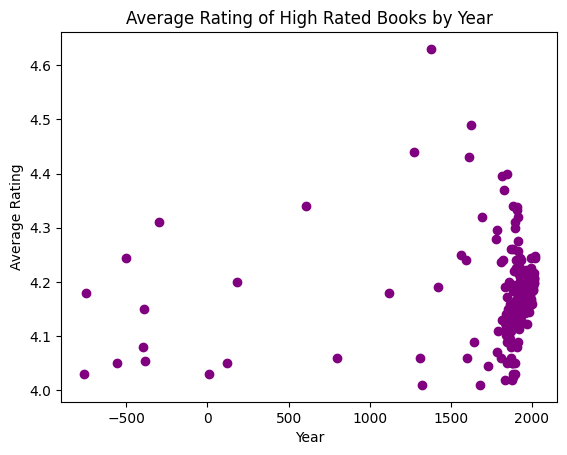

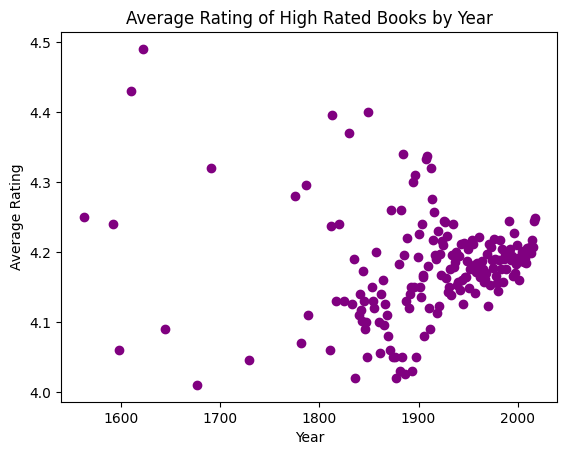

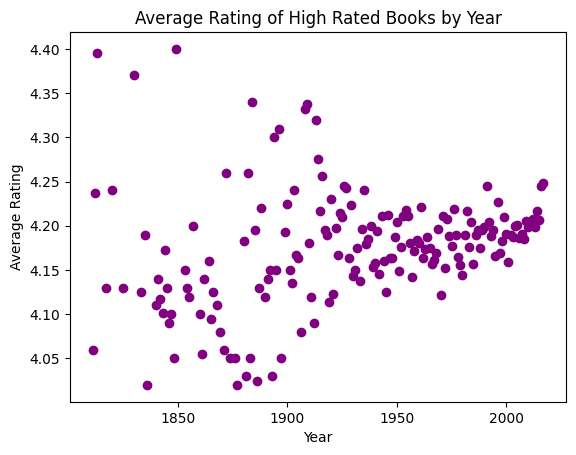

In [3]:

high_rated_books1 = b[(b['average_rating'] > 4)]

ratings_by_year1 = high_rated_books1.groupby('original_publication_year')['average_rating'].mean()

plt.scatter(ratings_by_year1.index, ratings_by_year1.values, color='purple')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of High Rated Books by Year')

plt.show()

high_rated_books2 = b[(b['average_rating'] > 4) & (b['original_publication_year']<=2022) & (b['original_publication_year']>=1500)]

ratings_by_year2 = high_rated_books2.groupby('original_publication_year')['average_rating'].mean()

plt.scatter(ratings_by_year2.index, ratings_by_year2.values, color='purple')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of High Rated Books by Year')

plt.show()

high_rated_books3 = b[(b['average_rating'] > 4) & (b['original_publication_year']<=2022) & (b['original_publication_year']>=1800)]

ratings_by_year3 = high_rated_books3.groupby('original_publication_year')['average_rating'].mean()

plt.scatter(ratings_by_year3.index, ratings_by_year3.values, color='purple')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of High Rated Books by Year')

plt.show()


**Question 2: What is the Probability Mass Function (PMF) of avearge rating of books in 21st century?**

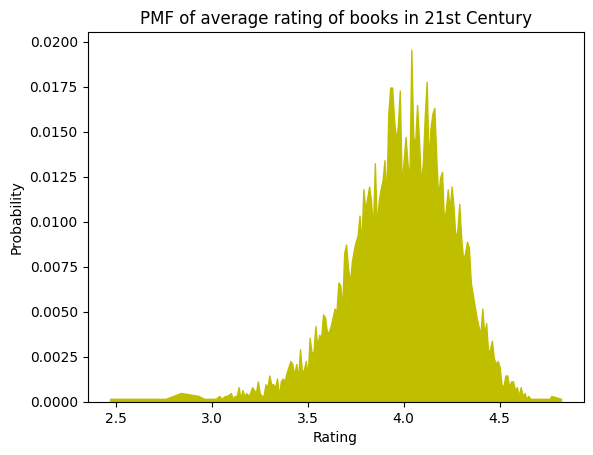

In [4]:

after_2000 = b[(b['average_rating']>=0) & (b['original_publication_year'] >= 2000)]

counting = after_2000['average_rating'].value_counts().sort_index()

probability = counting / counting.sum()

plt.stackplot(probability.index, probability.values, color='y')
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('PMF of average rating of books in 21st Century')
plt.show()

**Question 3: What is the number of books by language?**

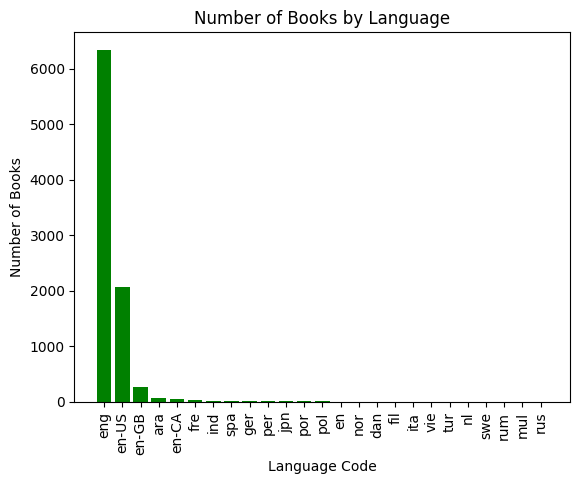

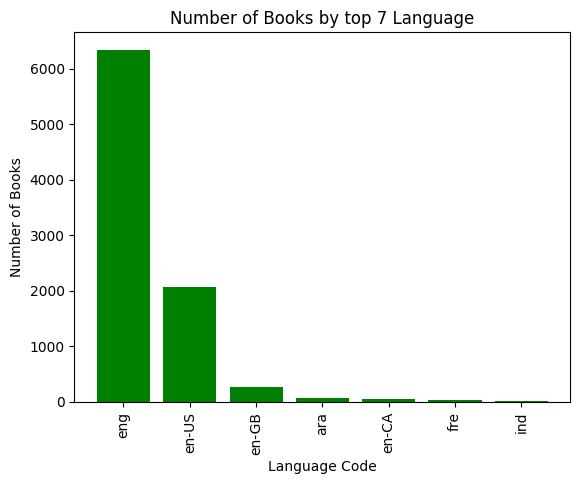

In [5]:

language_counts = b["language_code"].value_counts()

plt.bar(language_counts.index, language_counts.values, color='g')

plt.title("Number of Books by Language")
plt.xlabel("Language Code")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)

plt.show()

language_counts = b["language_code"].value_counts().head(7)

plt.bar(language_counts.index, language_counts.values, color='g')

plt.title("Number of Books by top 7 Language")
plt.xlabel("Language Code")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)

plt.show()

**Question 4: What are the top 10 authors with most number of books of high average rating (>4)?**

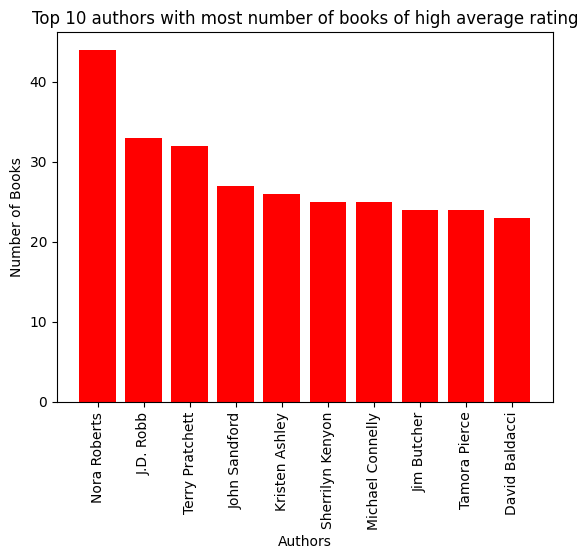

In [6]:

hr_author = b[b['average_rating']>=4]
hr_author = hr_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.bar(hr_author.index, hr_author['title'], color='r')

plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Top 10 authors with most number of books of high average rating')
plt.xticks(rotation=90)

plt.show()


**Question 5: What are the top 10 most rated books?**

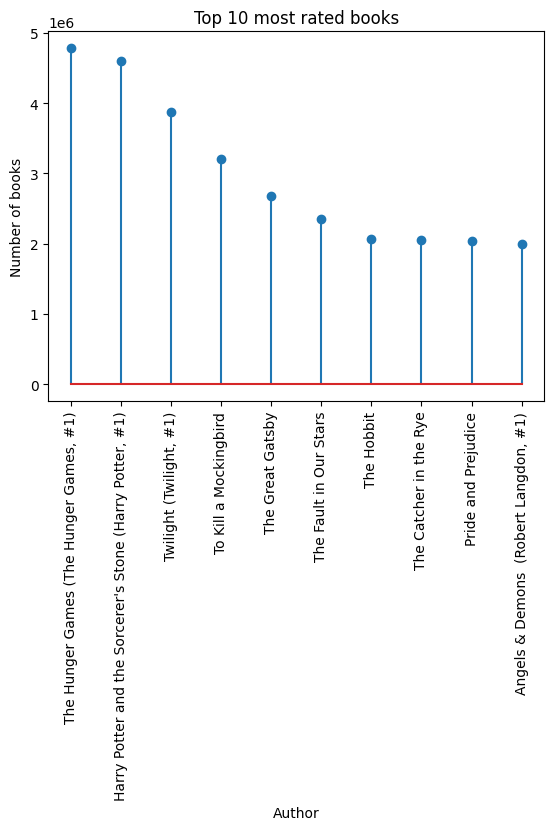

In [7]:

most_ratings = b.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.stem(most_ratings.index, most_ratings['ratings_count'])

plt.xlabel('Author')
plt.ylabel('Number of books')
plt.title('Top 10 most rated books')
plt.xticks(rotation=90)

plt.show()